### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

In [ ]:
# write your code from here

Simulating concept drift and preparing visualization...


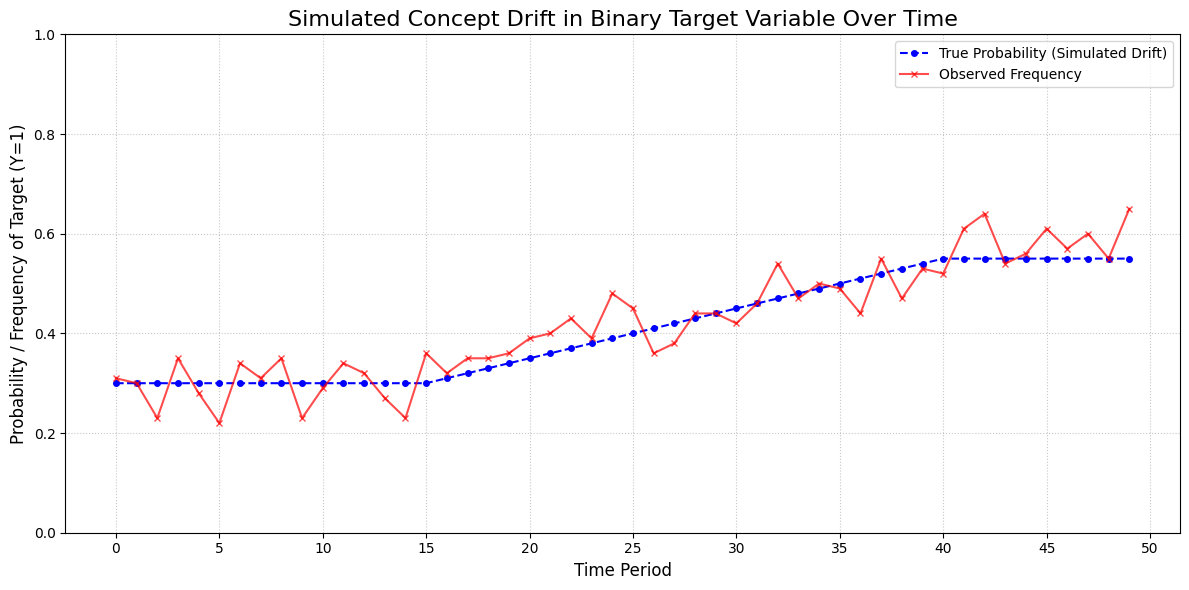


Concept drift simulation and visualization complete. The plot shows how the distribution of the binary target variable changes over time.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Simulating concept drift and preparing visualization...")

# --- Parameters for Concept Drift Simulation ---
num_time_periods = 50  # Number of simulated time periods
samples_per_period = 100 # Number of data points in each time period
base_probability = 0.3  # Initial probability of the binary target (e.g., P(Y=1))
drift_magnitude = 0.01 # How much the probability changes per period
drift_start_period = 15 # When the drift starts
drift_end_period = 40   # When the drift ends

# --- Simulate Concept Drift ---
# This list will store the true probability of the target variable for each period
true_probabilities = []
# This list will store the observed frequency of the target variable for each period
observed_frequencies = []

for i in range(num_time_periods):
    current_probability = base_probability

    # Introduce concept drift between drift_start_period and drift_end_period
    if drift_start_period <= i < drift_end_period:
        # Gradually increase the probability over time
        current_probability = base_probability + (i - drift_start_period) * drift_magnitude
        # Ensure probability stays within [0, 1]
        current_probability = np.clip(current_probability, 0.0, 1.0)
    elif i >= drift_end_period:
        # Keep the probability constant after the drift ends (at its peak value)
        current_probability = base_probability + (drift_end_period - drift_start_period) * drift_magnitude
        current_probability = np.clip(current_probability, 0.0, 1.0)

    true_probabilities.append(current_probability)

    # Simulate binary data for the current period based on current_probability
    # np.random.binomial(n, p, size) generates n trials with probability p, repeated 'size' times.
    # Here, n=1 for a single binary outcome, and size=samples_per_period for multiple samples.
    simulated_data = np.random.binomial(1, current_probability, samples_per_period)

    # Calculate the observed frequency (proportion of 1s) in the simulated data
    observed_frequency = np.mean(simulated_data)
    observed_frequencies.append(observed_frequency)

# --- Visualize the Concept Drift ---
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(range(num_time_periods), true_probabilities, label='True Probability (Simulated Drift)', color='blue', linestyle='--', marker='o', markersize=4)
plt.plot(range(num_time_periods), observed_frequencies, label='Observed Frequency', color='red', alpha=0.7, marker='x', markersize=4)

plt.title('Simulated Concept Drift in Binary Target Variable Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Probability / Frequency of Target (Y=1)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.legend(fontsize=10) # Display the legend
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probabilities
plt.xticks(np.arange(0, num_time_periods + 1, 5)) # Set x-axis ticks for clarity
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

print("\nConcept drift simulation and visualization complete. The plot shows how the distribution of the binary target variable changes over time.")
